In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Veri setini yükleme ve işleme adımları
data = pd.read_csv(r"/kaggle/input/hardfakevsrealfaces/data.csv")

# Resim boyutları
height, width = 224, 224

# Resimleri yükleme ve işleme
X = np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img = load_img(r"/kaggle/input/hardfakevsrealfaces/{}/{}.jpg".format(data.loc[i, 'label'], data.loc[i, 'images_id']),
                   target_size=(height, width))
    X[i] = img_to_array(img)

# Etiketleri değiştirme
def changeLabels(x):
    return labels[x]

labels = data.label.unique()
labels = {labels[i]: i for i in range(labels.size)}
y = data.label.apply(changeLabels)

# One-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, len(labels))

# Veri setini train-test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)



2024-05-22 15:22:28.559810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 15:22:28.559940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 15:22:28.722545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
# ResNet50 modelini yükleme
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Transfer learning: ResNet50 modelinin üstüne yeni katmanlar ekleyerek özelleştirme
x = Flatten()(resnet.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45)(x)
output = Dense(len(labels), activation='softmax')(x)

# Yeni modeli oluşturma
model = Model(resnet.input, output)

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Modelin eğitimi
epochs = 15
stats = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/15


I0000 00:00:1716391518.055897     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716391518.155721     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8611 - loss: 4.8155

W0000 00:00:1716391566.637216     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8639 - loss: 4.8141   

W0000 00:00:1716391571.194330     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8666 - loss: 4.8129 - val_accuracy: 0.5411 - val_loss: 13052750.0000
Epoch 2/15


W0000 00:00:1716391577.302539     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.9829 - loss: 0.3675 - val_accuracy: 0.5411 - val_loss: 319414336.0000
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.9863 - loss: 0.0694 - val_accuracy: 0.5411 - val_loss: 4013849.0000
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.9999 - loss: 0.0055 - val_accuracy: 0.5459 - val_loss: 135200.3125
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.6812 - val_loss: 12227.0820
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8406 - val_loss: 2275.4919
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 1.0000 - loss: 5.9059e-04 - val_accuracy: 0.8986 - val_loss: 482.0424
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 1.0000 - loss: 5.1084e-05 - val_accuracy: 0.9517 - val_loss: 65.5175
Epoch 9/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 1.0000 - loss:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Accuracy:
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.9939 - loss: 0.0995


W0000 00:00:1716391988.416240     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3/9 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

W0000 00:00:1716391992.899807     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 548ms/step


W0000 00:00:1716391997.281572     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


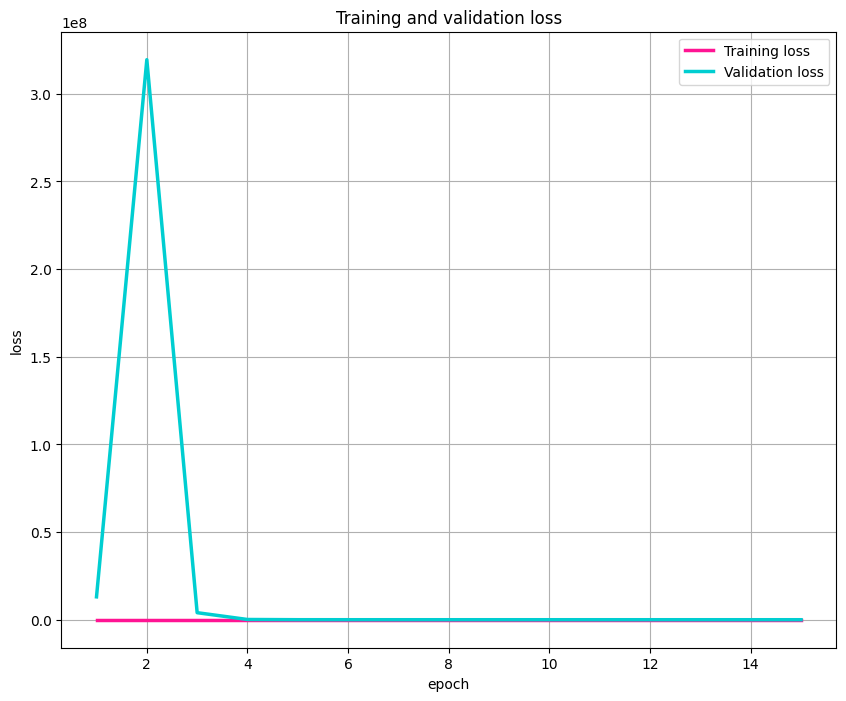

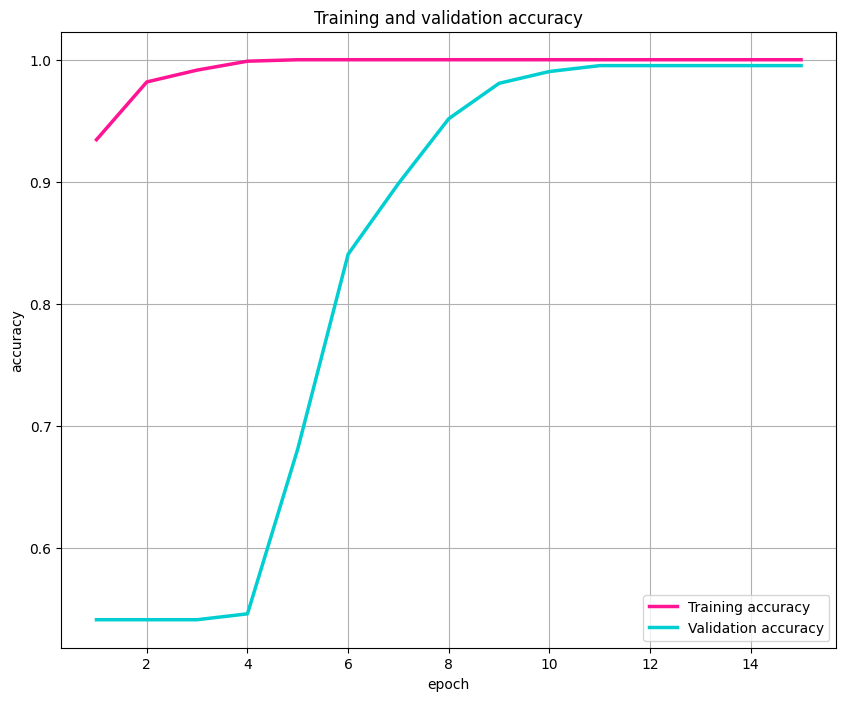

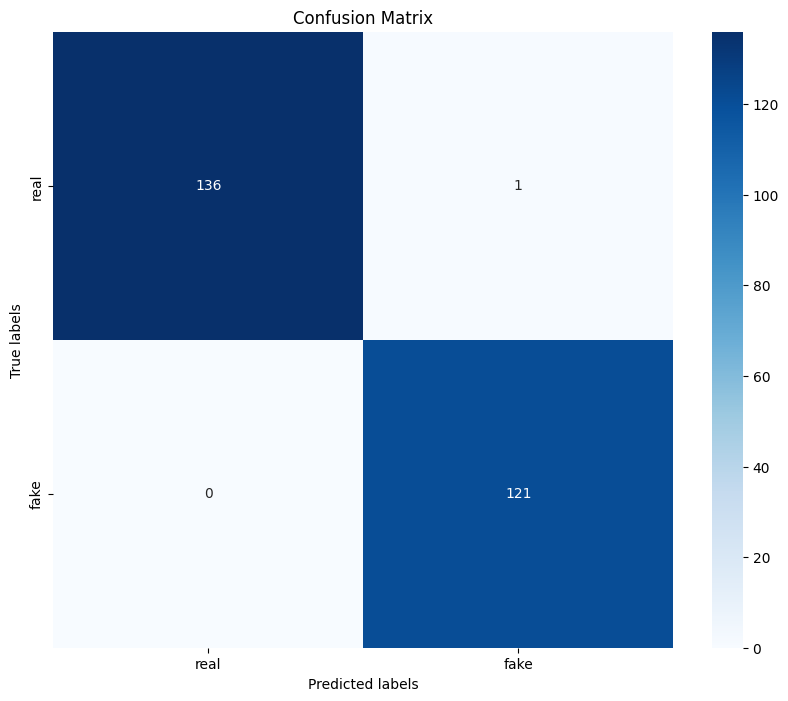

In [8]:
# Eğitim istatistiklerini görselleştirme
stats_df = pd.DataFrame(stats.history)
stats_df['epoch'] = list(range(1, epochs+1))

plt.figure(figsize=(10, 8))
sns.lineplot(y='loss', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training loss")
sns.lineplot(y='val_loss', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, label="Validation loss")
plt.grid()
plt.legend()
plt.title("Training and validation loss")

plt.figure(figsize=(10, 8))
sns.lineplot(y='accuracy', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training accuracy")
sns.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, label="Validation accuracy")
plt.grid()
plt.legend()
plt.title("Training and validation accuracy")

# Test verisi üzerinde modelin performansını değerlendirme
print('Accuracy:')
_, accuracy = model.evaluate(X_test, y_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', xticklabels=labels.keys(), yticklabels=labels.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()